In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df1=pd.read_csv("https://github.com/ActiveConclusion/COVID19_AirTraffic/raw/master/opensky_data/flightlist_20200101_20200131.csv.gz")
df2=pd.read_csv("https://github.com/ActiveConclusion/COVID19_AirTraffic/raw/master/opensky_data/flightlist_20200201_20200229.csv.gz")
df3=pd.read_csv("https://github.com/ActiveConclusion/COVID19_AirTraffic/raw/master/opensky_data/flightlist_20200301_20200331.csv.gz")
df4=pd.read_csv("https://github.com/ActiveConclusion/COVID19_AirTraffic/raw/master/opensky_data/flightlist_20200401_20200430.csv.gz")


In [ ]:
data=pd.concat([df1,df2,df3,df4],axis=0)

In [ ]:
data

,callsign,number,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,Unnamed: 0
0,SVA816,NaN,710064,HZ-AK24,B77W,NaN,NaN,2019-12-31 00:19:47+00:00,2020-01-01 13:27:28+00:00,2020-01-01 00:00:00+00:00,NaN
1,THY183,NaN,4ba9c1,TC-JNA,A332,NaN,LTBW,2019-12-31 00:25:26+00:00,2020-01-01 07:48:41+00:00,2020-01-01 00:00:00+00:00,NaN
2,CES738,MU738,781418,NaN,NaN,YMML,YSSY,2019-12-31 01:08:54+00:00,2020-01-01 01:45:29+00:00,2020-01-01 00:00:00+00:00,NaN
3,CES771,MU771,781858,NaN,NaN,YSSY,EHAM,2019-12-31 01:29:25+00:00,2020-01-01 04:08:28+00:00,2020-01-01 00:00:00+00:00,NaN
4,HAL5,HA5,a455ea,N379HA,A332,KLAS,NaN,2019-12-31 02:23:05+00:00,2020-01-01 08:52:18+00:00,2020-01-01 00:00:00+00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
303719,SKW4306,OO4306,ac018c,N873AS,CRJ2,NaN,NaN,2020-04-30 23:41:36+00:00,2020-04-30 23:53:27+00:00,2020-04-30 00:00:00+00:00,303804.0
303720,HDA782,KA782,78019c,B-HLT,A333,VHHH,NaN,2020-04-30 23:41:53+00:00,2020-04-30 23:54:53+00:00,2020-04-30 00:00:00+00:00,303805.0
303721,CAL511,CI511,8991a9,B-18361,A333,RCTP,NaN,2020-04-30 23:43:09+00:00,2020-04-30 23:58:14+00:00,2020-04-30 00:00:00+00:00,303806.0
303722,AAL397,AA397,ac82f8,N905NN,B738,KMIA,NaN,2020-04-30 23:43:22+00:00,2020-04-30 23:54:41+00:00,2020-04-30 00:00:00+00:00,303807.0


In [ ]:
data.tail()

,callsign,number,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,Unnamed: 0
303719,SKW4306,OO4306,ac018c,N873AS,CRJ2,NaN,NaN,2020-04-30 23:41:36+00:00,2020-04-30 23:53:27+00:00,2020-04-30 00:00:00+00:00,303804.0
303720,HDA782,KA782,78019c,B-HLT,A333,VHHH,NaN,2020-04-30 23:41:53+00:00,2020-04-30 23:54:53+00:00,2020-04-30 00:00:00+00:00,303805.0
303721,CAL511,CI511,8991a9,B-18361,A333,RCTP,NaN,2020-04-30 23:43:09+00:00,2020-04-30 23:58:14+00:00,2020-04-30 00:00:00+00:00,303806.0
303722,AAL397,AA397,ac82f8,N905NN,B738,KMIA,NaN,2020-04-30 23:43:22+00:00,2020-04-30 23:54:41+00:00,2020-04-30 00:00:00+00:00,303807.0
303723,HKC320,RH320,780a43,B-LNW,A332,NaN,VHHH,2020-04-30 23:47:48+00:00,2020-04-30 23:58:56+00:00,2020-04-30 00:00:00+00:00,303808.0


In [ ]:
data['timeStamp']=pd.to_datetime(data['firstseen'])
data['Hr']=data['timeStamp'].apply(lambda time: time.hour)
data['Month']=data['timeStamp'].apply(lambda time: time.month)
data['day']=data['timeStamp'].apply(lambda time: time.dayofweek)

In [ ]:
data.head()

,callsign,number,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,Unnamed: 0
0,SVA816,NaN,710064,HZ-AK24,B77W,NaN,NaN,2019-12-31 00:19:47+00:00,2020-01-01 13:27:28+00:00,2020-01-01 00:00:00+00:00,NaN
1,THY183,NaN,4ba9c1,TC-JNA,A332,NaN,LTBW,2019-12-31 00:25:26+00:00,2020-01-01 07:48:41+00:00,2020-01-01 00:00:00+00:00,NaN
2,CES738,MU738,781418,NaN,NaN,YMML,YSSY,2019-12-31 01:08:54+00:00,2020-01-01 01:45:29+00:00,2020-01-01 00:00:00+00:00,NaN
3,CES771,MU771,781858,NaN,NaN,YSSY,EHAM,2019-12-31 01:29:25+00:00,2020-01-01 04:08:28+00:00,2020-01-01 00:00:00+00:00,NaN
4,HAL5,HA5,a455ea,N379HA,A332,KLAS,NaN,2019-12-31 02:23:05+00:00,2020-01-01 08:52:18+00:00,2020-01-01 00:00:00+00:00,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4344024 entries, 0 to 303723
Data columns (total 14 columns):
 #   Column        Dtype              
---  ------        -----              
 0   callsign      object             
 1   number        object             
 2   icao24        object             
 3   registration  object             
 4   typecode      object             
 5   origin        object             
 6   destination   object             
 7   firstseen     object             
 8   lastseen      object             
 9   day           int64              
 10  Unnamed: 0    float64            
 11  timeStamp     datetime64[ns, UTC]
 12  Hr            int64              
 13  Month         int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(9)
memory usage: 497.1+ MB


In [ ]:
a=data["origin"].str[1:].value_counts()
a.head()
Total=data['origin'].value_counts().sum()
Total

3259607

In [ ]:
'''plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Values NAN or NULL")
'''

'plt.figure(figsize=(12,8))\nsns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap=\'viridis\')\nplt.title("Missing Values NAN or NULL")\n'

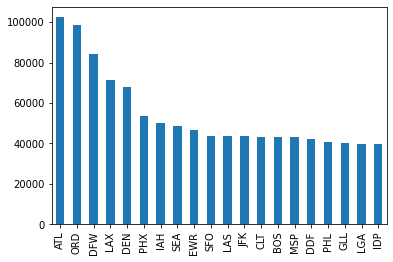

In [ ]:
a.head(20).plot.bar()

In [ ]:
b=data["typecode"].value_counts()
b.head(20)	

B738    604394
A320    562329
B737    299913
A319    213389
A321    211438
CRJ9    131965
CRJ2    124577
E75L    120512
B739    105779
CRJ7     83911
E145     76977
B77W     72515
B763     70719
B752     69742
A333     64995
E190     57180
A20N     51359
E75S     50947
B772     38153
B712     38133
Name: typecode, dtype: int64

Text(0.5, 1.0, 'Aircraft Utilization Prior Covid')

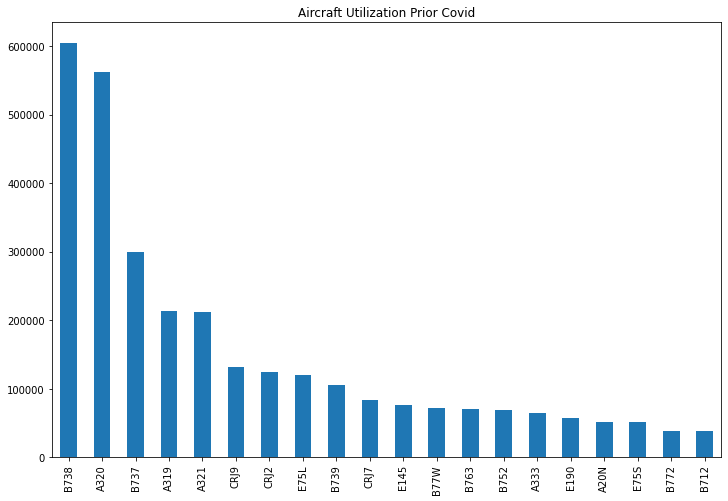

In [ ]:
plt.figure(figsize=(12,8))
b.head(20).plot.bar()
plt.title("Aircraft Utilization Prior Covid")

In [ ]:
c = data[data['registration'].str.startswith('N', na=False)]['registration'].count()
c

2231812

In [ ]:
c/Total

0.6846874485175667

In [ ]:

c = data[data['registration'].str.contains('A7',na=False)]#['registration'].count()
c.tail(10)

,callsign,number,icao24,registration,typecode,origin,destination,firstseen,lastseen,day,Unnamed: 0,timeStamp,Hr,Month
300469,QTR8941,QR8941,06a07f,A7-BFA,B77L,NaN,OTHH,2020-04-30 14:33:07+00:00,2020-04-30 23:12:54+00:00,3,300551.0,2020-04-30 14:33:07+00:00,14,4
300606,QTR8960,QR8960,06a0df,A7-BFF,B77L,OTHH,NaN,2020-04-30 14:55:35+00:00,2020-04-30 18:56:11+00:00,3,300688.0,2020-04-30 14:55:35+00:00,14,4
300630,JAL34,JL34,8682da,JA740J,B77W,VTBS,RJTE,2020-04-30 14:59:22+00:00,2020-04-30 20:02:02+00:00,3,300712.0,2020-04-30 14:59:22+00:00,14,4
301589,QTR7458,QR7458,06a105,A7-ALQ,A359,EGCC,OTHH,2020-04-30 17:08:00+00:00,2020-04-30 23:26:26+00:00,3,301671.0,2020-04-30 17:08:00+00:00,17,4
301760,QTR8156,QR8156,06a080,A7-BFB,B77L,EBLG,OTHH,2020-04-30 17:34:45+00:00,2020-04-30 23:16:37+00:00,3,301843.0,2020-04-30 17:34:45+00:00,17,4
301806,QTR8157,QR8157,06a1e8,A7-BFK,B77L,EHAM,LSZM,2020-04-30 17:41:37+00:00,2020-04-30 18:32:27+00:00,3,301889.0,2020-04-30 17:41:37+00:00,17,4
302377,QTR8577,QR8577,06a1a4,A7-AFI,A332,OTHH,LTBW,2020-04-30 19:09:16+00:00,2020-04-30 22:53:04+00:00,3,302460.0,2020-04-30 19:09:16+00:00,19,4
303529,QTR8131,QR8131,06a1e7,A7-BFJ,B77L,KATL,KDFW,2020-04-30 22:21:06+00:00,2020-04-30 23:59:29+00:00,3,450.0,2020-04-30 22:21:06+00:00,22,4
303556,QTR498,QR498,06a0be,A7-BCZ,B788,OTHH,NaN,2020-04-30 22:27:12+00:00,2020-04-30 23:00:22+00:00,3,303641.0,2020-04-30 22:27:12+00:00,22,4
303690,JAL905,JL905,868dda,JA772J,B772,RJTT,NaN,2020-04-30 23:16:58+00:00,2020-04-30 23:58:41+00:00,3,303775.0,2020-04-30 23:16:58+00:00,23,4


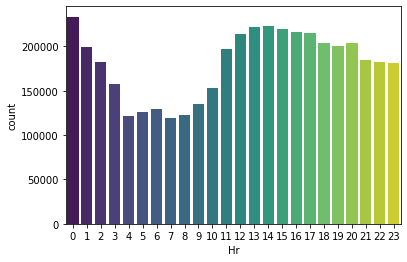

In [ ]:
sns.countplot(x="Hr", data=data,palette='viridis')

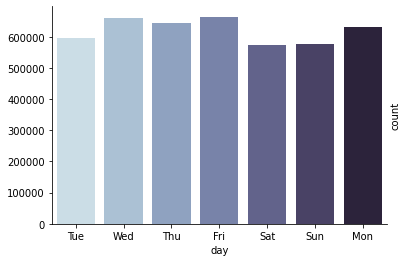

In [ ]:
#sns.countplot(x="day", data=data,palette='viridis')
fig, ax = plt.subplots()
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['day'] = data['day'].map(dmap)
sns.countplot(x='day',data=data,palette='ch:s=.25,rot=-.25')
ax.yaxis.set_label_position('right')
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

# To relocate the legend
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

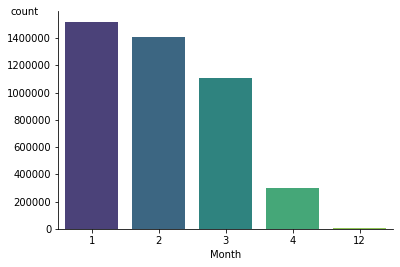

In [ ]:
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
ax.yaxis.set_label_coords(-.1,1.02)
ax.set_ylabel(r"Efficacit\'e", rotation='horizontal')
ax.yaxis.set_label_position('right')
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
sns.countplot(x="Month", data=data,palette='viridis')

#emap = {0:'Dec',1:'Jan',2:'Feb',3:'Mar'}
#data['Month'] = data['Month'].map(emap)
#sns.countplot(x='Month',data=data,palette='ch:s=.25,rot=-.25')

B    1459730
A    1257155
E     398240
C     361228
D      48719
Name: typecode, dtype: int64


Text(0.5, 1.0, 'Most Famous Manufacturer')

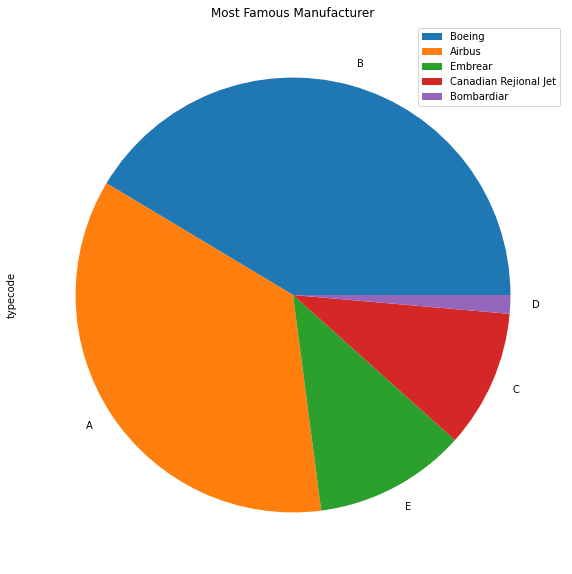

In [ ]:
plt.figure(figsize=(18,10))
manufacturer = data['typecode'].str[0].value_counts().head(5)
print(manufacturer)
manufacturer.plot.pie()
plt.legend(["Boeing","Airbus","Embrear","Canadian Rejional Jet","Bombardiar" ])
plt.title("Most Famous Manufacturer")

In [ ]:
x5 = val1['price']

plt.hist(x5, bins=20)

plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

DataSet:
https://zenodo.org/record/4601479#.YFAkJZNKhQJ
